In [1]:
from numpy import*
import matplotlib
from matplotlib.pyplot import *
import pylab as plt

In [2]:
 def simpson(f,a,b,n):
    h=(b-a)/n
    for i in range(n):
        res=f(a+h/2+i*h)*2*h/3
    for j in range(1,n):
        ras=f(a+i*h)*h/3
    return res+ras+(h/6)*(f(a)+f(b))

In [3]:
def f(x):
    return e**(-x**2/2)

In [4]:
def simpsonf(f,a,b,n):
    ft = list(map(lambda x: f(x), arange(a,b+(b-a)/n,(b-a)/n)))
    fm = list(map(lambda x: f(x), arange(a+(b-a)/2/n,b+(b-a)/2/n,(b-a)/n)))
    return ((sum(ft)-(ft[0]+ft[-1])*0.5)*(b-a)/n+2*(sum(fm)*(b-a)/n))/3

In [5]:
print(simpsonf(f,-5,5,10))
print(sqrt(2*pi),exp(-5**2/2))

2.5066266569372226
2.5066282746310002 3.726653172078671e-06


In [6]:
def midpoint(f,a,b,h):
    fs = list(map(lambda y: f(y), arange(a+h/2,b+h/2,h)))
    return sum(fs)*h

In [7]:
def Integrator(f,x):
    h=0.2
    if x>-2:
        newx=round((x+2)/h)*h-2
        return midpoint(f,-2,newx,h)
    else:
        newx=-2-round((-2-x)/h)*h
        return -midpoint(f,newx,-2,h)

In [8]:
def Integrator2(f,x):
    h=0.2
    if x>-2:
        newx=x
        return midpoint(f,-2,newx,h)
    else:
        newx=x
        return -midpoint(f,newx,-2,h)

In [9]:
def g(y):
    return y**2

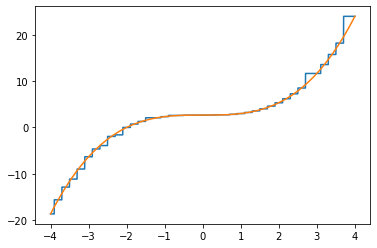

In [10]:
xs= linspace(-4,4,2000)
ys= [Integrator(g,i)for i in linspace(-4,4,2000)]
plt.plot(xs,ys)
plt.plot(xs,[(x**3+8)/3 for x in xs])

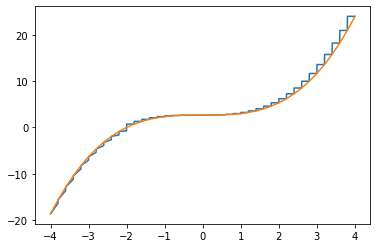

In [11]:
xs= linspace(-4,4,2000)
ys= [Integrator2(g,xs[i]) for i in range(2000)]
plt.plot(xs,ys)
plt.plot(xs,[(x**3+8)/3 for x in xs])

In [12]:
# alpha is a list, a is the initial point [a,b] is the interval on which we want solution
# N is the number of subintervals, so that h = (b-a)/N is the small increment
def euler(alpha,a,b,N,F):
    h = (b-a)/N
    ys = zeros([N+1,alpha.size])
    ys[0] = alpha
    xs = arange(a,b+h/2,h)
    for i in range(N):
        xi=a+i*h
        ys[i+1] = ys[i] + h*F(xi,ys[i])
    return xs,ys[:,0]

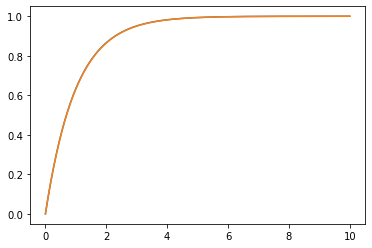

In [13]:
def Fnthorder(x,yvec):
    res = zeros(yvec.size)
    for i in range(yvec.size-1):
        res[i] = yvec[i+1]
    res[yvec.size-1] = f(x,yvec)
    return res

def f(x,yvec):
    return -yvec[1]

alpha=array([0.,1.])
xs,ys=euler(alpha,0,10,1000,Fnthorder)
import matplotlib.pylab as plt
plt.plot(xs,ys)
plt.plot(xs,1-e**(-xs))
plt.show()

In [14]:
def eulerk(alpha,a,b,N,F):
    h = (b-a)/N
    ys = zeros([N+1,alpha.size])
    ys[0] = alpha
    xs = arange(a,b+h/2,h)
    for i in range(N):
        xi=a+i*h
        K0=h*F(xi,ys[i])
        K1=h*F(xi+h/2,ys[i]+K0/2)
        ys[i+1] = ys[i] + K1
    return xs,ys

In [15]:
def Fnthorder(x,yvec):
    res = zeros(yvec.size)
    for i in range(yvec.size-1):
        res[i] = yvec[i+1]
    res[yvec.size-1] = f(x,yvec)
    return res

In [16]:
def f(x,yvec):
    return -yvec[1]

alpha=array([0.,1.])

xs,ys=eulerk(alpha,0,30,2000,Fnthorder)

In [17]:
def rungekutta4(alpha,a,b,h,F):
    N = round((b-a)/h)
    ys = zeros([N+1,alpha.size])
    ys[0] = alpha
    xs = arange(a,b+h,h)
    for i in arange(N):
        xi = a + i*h  # = xs[i]
        yi = ys[i]
        K0 = h*F(xi,yi)
        K1 = h*F(xi+h/2,yi+K0/2)
        K2 = h*F(xi+h/2,yi+K1/2)
        K3 = h*F(xi+h,yi+K2)
        ys[i+1] = yi + (K0+2*K1+2*K2+K3)/6
    return ys[-1]

def Integratorf(F,x):
    h=0.1
    newx = round(x/h)*h
    init = array([1.]*2)
    return rungekutta4(init,0,newx,h,F)

A=array([[2,3],[0,-2]])

def ourF(x,y):
    return dot(A,y)

print (Integratorf(ourF,1),Integratorf(ourF,2),Integratorf(ourF,3))
import scipy.linalg as sp
print(dot(sp.expm(A),array([1.]*2)), dot(sp.expm(2*A),array([1.]*2)), dot(sp.expm(3*A),array([1.]*2)))

[12.82905151  0.13533955] [9.55287098e+01 1.83167934e-02] [7.05950702e+02 2.47898654e-03]
[12.82934671  0.13533528] [9.55330258e+01 1.83156389e-02] [7.05998530e+02 2.47875218e-03]


In [26]:
def Fnthorder2(x,yvec):
    res = zeros(yvec.size)
    for i in range(yvec.size-1):
        res[i] = yvec[i+1]
    res[yvec.size-1] = f(x,yvec)
    return res

In [27]:
#alpha=array([1.,1.]).T
#A=array([[2,3],[0,-2]])
#def l(x,yvec):
 #   return dot(A,yvec[0])
#print(Integrator2(Fnthorder2(2,[3])))